In [6]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [7]:
arr2= np.load('data_array_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.003947365799861489 0.027369683484445913 0.1383737517831669 ... 0 0 0]
 [0.021052629002770076 0.05163376910306254 0.14122681883024252 ... 0 1 0]
 [0.003947365799861489 0.004640614264768108 0.19115549215406563 ... 1 0 0]
 ...
 [0.05263157645429362 0.013200240283036896 0.16690442225392296 ... 1 0 0]
 [0.09210526076869806 0.04963356512358402 0.19543509272467904 ... 1 0 0]
 [0.001973681584141267 0.012877102478217349 0.11269614835948645 ... 0 1 0]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


# SVM Linear

Best parameters set found on development set:
 {'C': 1000}

 Best Score 0.3309014538901801

 Grid scores on development set:
0.299 (+/-0.004) for {'C': 1}
0.299 (+/-0.004) for {'C': 10}
0.301 (+/-0.005) for {'C': 100}
0.331 (+/-0.036) for {'C': 1000}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.78      0.99      0.87      1019
         Bad       0.00      0.00      0.00       191
        Good       0.14      0.01      0.02       104

    accuracy                           0.77      1314
   macro avg       0.31      0.33      0.30      1314
weighted avg       0.61      0.77      0.68      1314



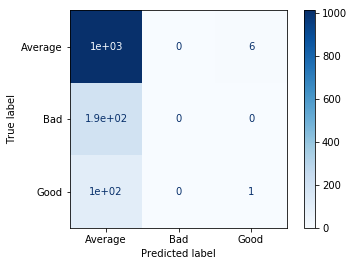

In [8]:
from sklearn.svm import LinearSVC #Use the optimized Linear SVC
#Grid Search
tuned_parameters = [{'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(LinearSVC(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

In [10]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.29469214 0.29469214 0.29481733 0.31385428 0.38538714]


### K best Data

In [11]:
#Load Kbest data
arr2= np.load('data_kBest.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


Best parameters set found on development set:
 {'C': 1000}

 Best Score 0.310419586353615

 Grid scores on development set:
0.296 (+/-0.000) for {'C': 1}
0.296 (+/-0.000) for {'C': 10}
0.296 (+/-0.000) for {'C': 100}
0.310 (+/-0.036) for {'C': 1000}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.78      1.00      0.87      1019
         Bad       0.00      0.00      0.00       191
        Good       0.00      0.00      0.00       104

    accuracy                           0.78      1314
   macro avg       0.26      0.33      0.29      1314
weighted avg       0.60      0.78      0.68      1314



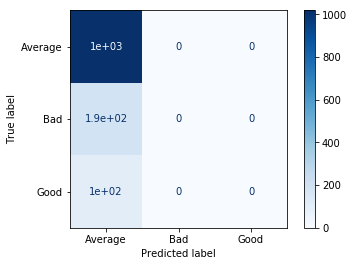

In [12]:
#Grid Search
tuned_parameters = [{'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(LinearSVC(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

In [13]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.34926968 0.36651582 0.29481733 0.29481733 0.2946593 ]


### K select Percentile

In [14]:
#Load Kbest data
arr2= np.load('data_select_percentile.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.003947365799861489 0.027369683484445913 0.1383737517831669 0 0]
 [0.021052629002770076 0.05163376910306254 0.14122681883024252 0 1]
 [0.003947365799861489 0.004640614264768108 0.19115549215406563 1 0]
 ...
 [0.05263157645429362 0.013200240283036896 0.16690442225392296 1 0]
 [0.09210526076869806 0.04963356512358402 0.19543509272467904 1 0]
 [0.001973681584141267 0.012877102478217349 0.11269614835948645 0 1]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


Best parameters set found on development set:
 {'C': 1000}

 Best Score 0.3507579982635564

 Grid scores on development set:
0.299 (+/-0.004) for {'C': 1}
0.301 (+/-0.004) for {'C': 10}
0.301 (+/-0.004) for {'C': 100}
0.351 (+/-0.066) for {'C': 1000}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.79      0.92      0.85      1019
         Bad       0.38      0.25      0.30       191
        Good       0.00      0.00      0.00       104

    accuracy                           0.75      1314
   macro avg       0.39      0.39      0.39      1314
weighted avg       0.67      0.75      0.71      1314



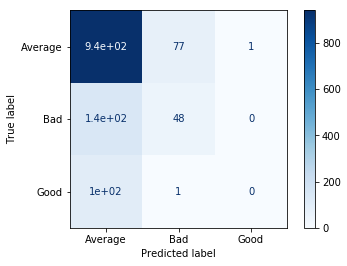

In [15]:
#Grid Search
tuned_parameters = [{'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(LinearSVC(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

In [16]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.33475966 0.29469214 0.29478458 0.2946593  0.2941844 ]


### PCA

In [17]:
#Load Kbest data
arr2= np.load('data_pca.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[-0.2668990480532727 0.7955195541058508 -0.31189174404518605
  -0.06279000616091403]
 [-0.11249211937670339 0.11386167290926646 0.7960057304498621
  -0.566522736475527]
 [0.7533508178888383 -0.16531012330588044 -0.13103281872338923
  -0.029475859314786697]
 ...
 [0.7521852812229466 -0.16344152965792963 -0.13094237177940624
  -0.025483097537655243]
 [0.7517777704386579 -0.1613423366153525 -0.13139539788714713
  -0.020865925132946238]
 [-0.11242004274209731 0.11253824516972548 0.7963608411917731
  -0.5693779640319709]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


Best parameters set found on development set:
 {'C': 1000}

 Best Score 0.3126478720873561

 Grid scores on development set:
0.296 (+/-0.000) for {'C': 1}
0.296 (+/-0.000) for {'C': 10}
0.296 (+/-0.000) for {'C': 100}
0.313 (+/-0.034) for {'C': 1000}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.78      1.00      0.87      1019
         Bad       0.00      0.00      0.00       191
        Good       0.00      0.00      0.00       104

    accuracy                           0.78      1314
   macro avg       0.26      0.33      0.29      1314
weighted avg       0.60      0.78      0.68      1314



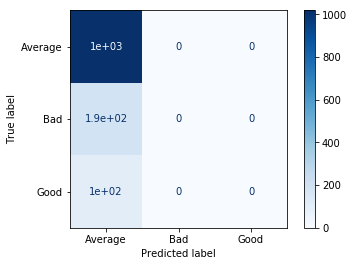

In [18]:
#Grid Search
tuned_parameters = [{'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(LinearSVC(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

In [19]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.29469214 0.29469214 0.29481733 0.40518801 0.2946593 ]
